In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, datasets

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
train_data = datasets.Flowers102(root="data", split='train', download=True, transform=data_transform)
val_data = datasets.Flowers102(root="data", split='val', download=True, transform=data_transform)
test_data = datasets.Flowers102(root="data", split='test', download=True, transform=data_transform)

100%|██████████| 345M/345M [00:23<00:00, 14.8MB/s]
100%|██████████| 502/502 [00:00<00:00, 606kB/s]
100%|██████████| 15.0k/15.0k [00:00<00:00, 21.3MB/s]


In [ ]:
len(train_data), len(test_data),len(val_data)

(1020, 6149, 1020)

In [ ]:
train_dataset = DataLoader(train_data, batch_size=32, shuffle=True)
val_dataset = DataLoader(val_data, batch_size=32, shuffle=False)
test_dataset = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
for imgs, labels in train_dataset:
    print(imgs.shape, labels.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [ ]:
img, label = train_data[0]
img, label

(tensor([[[0.0392, 0.0431, 0.0627,  ..., 0.5176, 0.5647, 0.5608],
          [0.0510, 0.0510, 0.0706,  ..., 0.5255, 0.5647, 0.5647],
          [0.0667, 0.0627, 0.0667,  ..., 0.5373, 0.5647, 0.5647],
          ...,
          [0.1216, 0.1216, 0.1098,  ..., 0.4745, 0.4745, 0.4667],
          [0.0980, 0.1137, 0.1176,  ..., 0.4706, 0.4706, 0.4667],
          [0.0941, 0.0980, 0.1176,  ..., 0.4745, 0.4667, 0.4627]],
 
         [[0.0824, 0.0902, 0.1176,  ..., 0.3765, 0.4078, 0.3882],
          [0.0863, 0.0941, 0.1216,  ..., 0.3804, 0.4039, 0.3882],
          [0.0902, 0.0941, 0.1098,  ..., 0.3882, 0.3961, 0.3882],
          ...,
          [0.2196, 0.2157, 0.2000,  ..., 0.3961, 0.3961, 0.3882],
          [0.2039, 0.2196, 0.2157,  ..., 0.4000, 0.3882, 0.3725],
          [0.2000, 0.2039, 0.2196,  ..., 0.4078, 0.3843, 0.3647]],
 
         [[0.0314, 0.0275, 0.0353,  ..., 0.5412, 0.6157, 0.5882],
          [0.0392, 0.0314, 0.0392,  ..., 0.5490, 0.6078, 0.5882],
          [0.0431, 0.0353, 0.0353,  ...,

In [ ]:
class flower102(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                 out_channels=hidden_units,
                 kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    # self.conv_block_4 = nn.Sequential(
    #     nn.Conv2d(in_channels=hidden_units,
    #               out_channels=hidden_units,
    #               kernel_size=3,
    #               padding=1),
    #     nn.ReLU(),
    #     nn.MaxPool2d(kernel_size=2,
    #                  stride=2)
    # )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*28*28,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape)

    )

  def forward(self, x:torch.Tensor):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.conv_block_4(x)
    # print(x.shape)
    x = self. classifier(x)
    # print(x.shape)

    return x



In [ ]:
model_0 = flower102(input_shape = 3,hidden_units = 16,output_shape = 102)
model_0

flower102(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12544, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=102, bias=True)
  )
)

In [ ]:
!pip install torchinfo
import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
flower102                                [1, 102]                  --
├─Sequential: 1-1                        [1, 16, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 16, 224, 224]         448
│    └─ReLU: 2-2                         [1, 16, 224, 224]         --
│    └─MaxPool2d: 2-3                    [1, 16, 112, 112]         --
├─Sequential: 1-2                        [1, 16, 56, 56]           --
│    └─Conv2d: 2-4                       [1, 16, 112, 112]         2,320
│    └─ReLU: 2-5                         [1, 16, 112, 112]         --
│    └─MaxPool2d: 2-6                    [1, 16, 56, 56]           --
├─Sequential: 1-3                        [1, 16, 28, 28]           --
│    └─Conv2d: 2-7                       [1, 16, 56, 56]           2,320
│    └─ReLU: 2-8                         [1, 16, 56, 56]           --
│    └─MaxPool2d: 2-9                    [1, 16, 28, 28]           --
├─Sequen

In [ ]:
dummy_img = torch.randn(1, 3, 224, 224).float().to(device)
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(dummy_img)
  print(y_logits)
  y_prob = torch.softmax(y_logits, dim=1)
  print(y_prob)
  y_pred = torch.argmax(y_prob, dim=1).item()
  print(y_pred)

tensor([[ 0.0057,  0.2240,  0.2163, -0.1995,  0.0672,  0.0609,  0.1430,  0.1169,
          0.1278, -0.1905, -0.1763, -0.2230,  0.1285,  0.1467,  0.1653, -0.1589,
          0.1645,  0.0859, -0.0548, -0.2143, -0.1695, -0.2223,  0.0741,  0.0509,
          0.2409, -0.0463,  0.1622,  0.0540, -0.0407, -0.0562,  0.2119, -0.0856,
         -0.0751,  0.0855, -0.2268,  0.1649,  0.1961,  0.0818,  0.1737,  0.0579,
          0.1136,  0.1822,  0.2802, -0.2277,  0.1067,  0.0888, -0.1852,  0.2639,
          0.1974,  0.0666, -0.0263, -0.1946, -0.1259, -0.1014, -0.1377, -0.0865,
         -0.2427,  0.1269, -0.1333,  0.2525, -0.1670,  0.0531,  0.2032,  0.1939,
          0.1836,  0.0315,  0.2475, -0.0165, -0.0817,  0.2100, -0.0801, -0.2386,
          0.0721,  0.2221,  0.1916,  0.1398,  0.0489,  0.0162,  0.2322,  0.0557,
          0.2029,  0.0471,  0.0854,  0.1733,  0.1599,  0.0545, -0.2155, -0.0504,
          0.1176, -0.2431,  0.1735,  0.1785, -0.1401, -0.0008,  0.0695,  0.1511,
         -0.1267, -0.1716,  

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from torchmetrics.classification import MulticlassAccuracy

model = model_0.to(device)
epochs = 30

epoch_count = []
train_loss_values = []
train_acc_values = []
val_loss_values = []
val_acc_values = []
test_loss_values = []
tes_loss_values = []
test_acc_values = []

for epoch in range(epochs):
  model.train()
  train_loss = 0
  train_accuracy = MulticlassAccuracy(num_classes=102).to(device)

  for (X, y) in train_dataset:
    X = X.to(device)
    y = y.long().to(device)

    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    train_accuracy.update(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss = train_loss/len(train_dataset)
  train_acc = train_accuracy.compute().item()

  model.eval()
  val_loss = 0
  val_accuracy = MulticlassAccuracy(num_classes=102).to(device)
  with torch.inference_mode():
    for val_X, val_y in val_dataset:
      val_X = val_X.to(device)
      val_y = val_y.long().to(device)

      val_pred = model(val_X)
      val_loss_cal = loss_fn(val_pred, val_y)
      val_loss += val_loss_cal.item()

      val_accuracy.update(val_pred, val_y)

  val_loss = val_loss/len(val_dataset)
  val_acc = val_accuracy.compute().item()


  test_loss = 0
  test_accuracy = MulticlassAccuracy(num_classes=102).to(device)

  with torch.inference_mode():
    for test_X, test_y in test_dataset:
      test_X = test_X.to(device)
      test_y = test_y.long().to(device)

      test_pred = model(test_X)
      test_loss_cal = loss_fn(test_pred, test_y)
      test_loss += test_loss_cal.item()

      test_accuracy.update(test_pred, test_y)

  test_loss = test_loss/len(test_dataset)
  test_acc = test_accuracy.compute().item()

  epoch_count.append(epoch)
  train_loss_values.append(train_loss)
  train_acc_values.append(train_acc)
  val_loss_values.append(val_loss)
  val_acc_values.append(val_acc)
  test_loss_values.append(test_loss)
  test_acc_values.append(test_acc)

  print(f"Epoch: {epoch+1} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")




Epoch: 1 | Train Loss: 4.6268 | Train Acc: 0.0069 | Val Loss: 4.6122 | Val Acc: 0.0118 | Test Loss: 4.6082 | Test Acc: 0.0085
Epoch: 2 | Train Loss: 4.5726 | Train Acc: 0.0147 | Val Loss: 4.5574 | Val Acc: 0.0137 | Test Loss: 4.5775 | Test Acc: 0.0128
Epoch: 3 | Train Loss: 4.5074 | Train Acc: 0.0216 | Val Loss: 4.5044 | Val Acc: 0.0235 | Test Loss: 4.5211 | Test Acc: 0.0236
Epoch: 4 | Train Loss: 4.4252 | Train Acc: 0.0265 | Val Loss: 4.4400 | Val Acc: 0.0157 | Test Loss: 4.4732 | Test Acc: 0.0157
Epoch: 5 | Train Loss: 4.3537 | Train Acc: 0.0363 | Val Loss: 4.3715 | Val Acc: 0.0284 | Test Loss: 4.4107 | Test Acc: 0.0240
Epoch: 6 | Train Loss: 4.2420 | Train Acc: 0.0363 | Val Loss: 4.3097 | Val Acc: 0.0353 | Test Loss: 4.3491 | Test Acc: 0.0289
Epoch: 7 | Train Loss: 4.1172 | Train Acc: 0.0559 | Val Loss: 4.2879 | Val Acc: 0.0275 | Test Loss: 4.3544 | Test Acc: 0.0294
Epoch: 8 | Train Loss: 3.9835 | Train Acc: 0.0549 | Val Loss: 4.2322 | Val Acc: 0.0382 | Test Loss: 4.3066 | Test Acc:

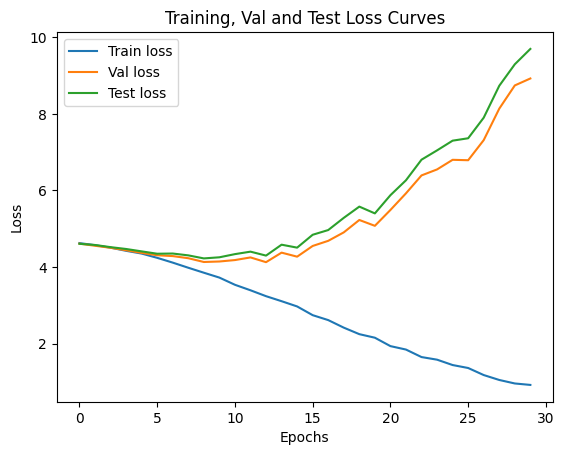

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_loss_np = torch.tensor(train_loss_values).cpu().numpy()
val_loss_np = torch.tensor(val_loss_values).cpu().numpy()
test_loss_np = torch.tensor(test_loss_values).cpu().numpy()

plt.plot(epoch_count, train_loss_np, label="Train loss")
plt.plot(epoch_count, val_loss_np, label="Val loss")
plt.plot(epoch_count, test_loss_np, label="Test loss")
plt.title("Training, Val and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

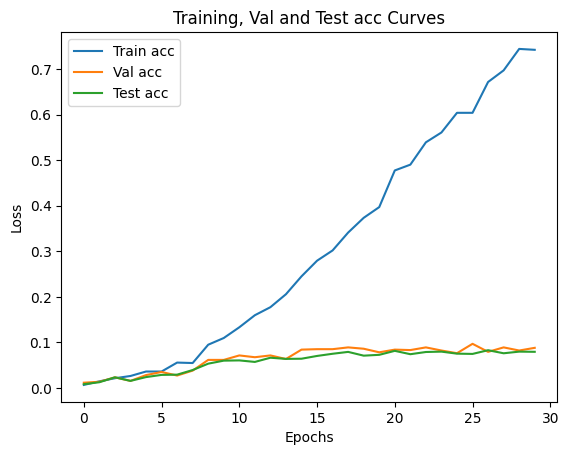

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_acc_np = torch.tensor(train_acc_values).cpu().numpy()
val_acc_np = torch.tensor(val_acc_values).cpu().numpy()
test_acc_np = torch.tensor(test_acc_values).cpu().numpy()

plt.plot(epoch_count, train_acc_np, label="Train acc")
plt.plot(epoch_count, val_acc_np, label="Val acc")
plt.plot(epoch_count, test_acc_np, label="Test acc")
plt.title("Training, Val and Test acc Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()